In [747]:
%clear

In [748]:
!tail -2 creditcard.csv

In [749]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

In [750]:
creditcard = pd.read_csv("creditcard.csv")

In [751]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Are there null values in the data?

In [752]:
print creditcard.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


# What are the transaction amounts classified as fraud?


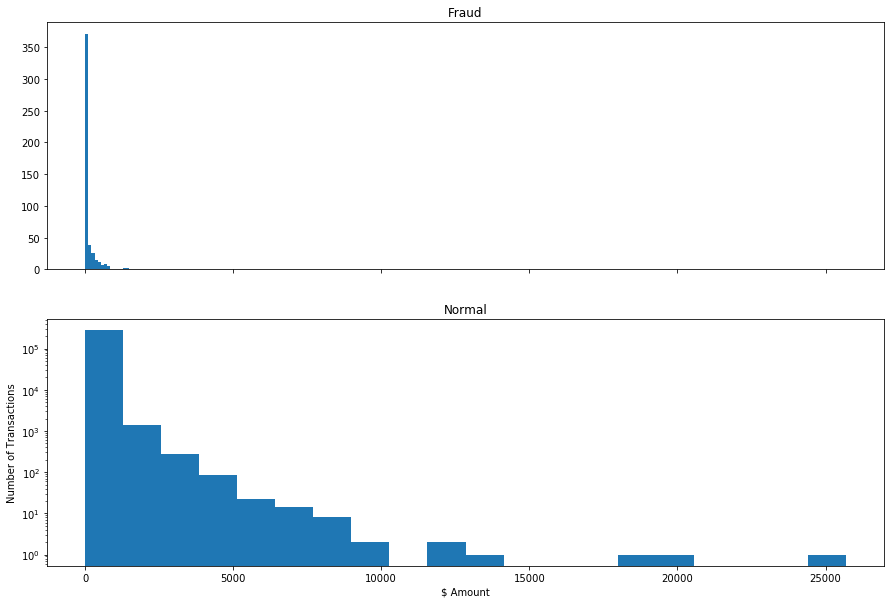

In [753]:
%matplotlib inline

f, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))

ax1.hist(creditcard.Amount[creditcard.Class == 1], bins = 20)
ax1.set_title('Fraud')

ax2.hist(creditcard.Amount[creditcard.Class == 0], bins = 20)
ax2.set_title('Normal')

plt.xlabel('$ Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')


# Fraudlent transactions were small amounts

# Is there a relationship between TIme and Fraud.

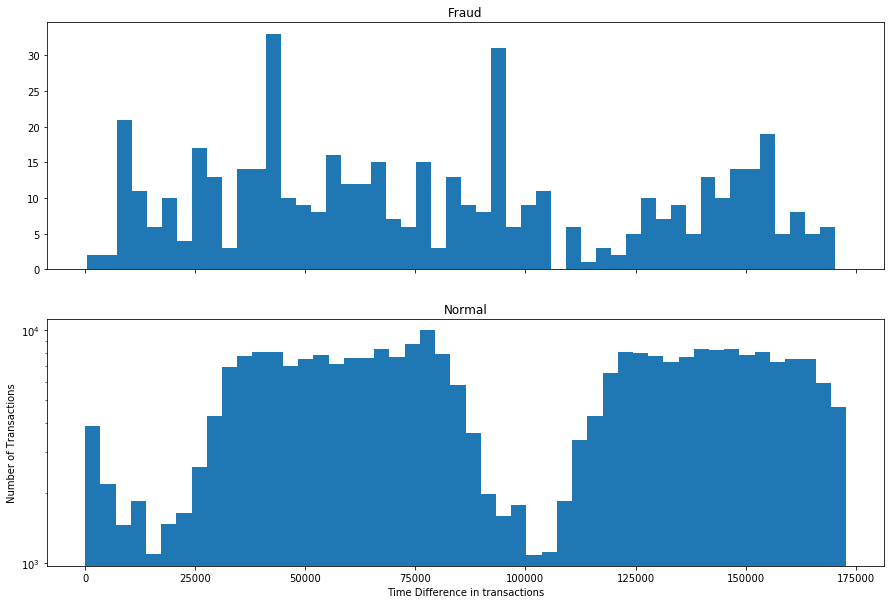

In [754]:
%matplotlib inline

f, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(15,10))

ax1.hist(creditcard.Time[creditcard.Class == 1], bins = 50)
ax1.set_title('Fraud')

ax2.hist(creditcard.Time[creditcard.Class == 0], bins = 50)
ax2.set_title('Normal')

plt.xlabel('Time Difference in transactions')
plt.ylabel('Number of Transactions')
plt.yscale('log')


# There doesnt seem to be any correlation between time and fraud.

#lets try dropping the time column???

In [755]:
#creditcard.drop(['Time'], axis=1, inplace=True)

In [756]:
X_orig=creditcard.ix[:,0:-1]
y_orig=creditcard.ix[:,'Class']

In [757]:
creditcard.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [758]:
492/float(284315)

0.0017304750013189597

#There is High imbalance in the Fraud and Normal Data....

## Strategy: 
## Under-sampling the data..because of high imbalance ( Will try over-sampling in next steps)
#undersampling to ( equal number of 1s and 0s)
#1. Use Logistic Regression.
#GridSearch for best logicisticregression parameters.
#train test split the sample data.
#fit the data., predict on whole data set.
#check auc_roc curve , recall value. (Accuracy score is not important when there is high unbalance in the class...since it will be high)

#2. Use RandomForestRegressor.
#Fit with Sample Data. Use GridSearch to find the best values for RandomForest.
#Use best values to fit the classifier.
#Fit and Predict using sample values.
#Check auc_roc_curve, recall_value.
    
#Fit and Predict using the whole data set.
#check precision recall curve, recall value.

In [759]:
import numpy as np

In [760]:
creditcard_0 = creditcard[creditcard.Class ==0].sample(frac=0.00173,replace=True).sample(frac=0.75, replace=True)
creditcard_1 = creditcard[creditcard.Class ==1].sample(frac=0.75, replace=True)

In [761]:
print creditcard_0.shape
print creditcard_1.shape

(369, 31)
(369, 31)


In [762]:
creditcard_sample = pd.concat([creditcard_0,creditcard_1])
creditcard_sample = creditcard_sample.sample(frac=1).reset_index(drop=True)
#print creditcard_sample.sort_values('Time')

In [763]:
X_sample=creditcard_sample.ix[:,0:-1]
y_sample=creditcard_sample.ix[:,'Class']
y_sample.value_counts()

1    369
0    369
Name: Class, dtype: int64

#See the 0/1 Sampled Dataset

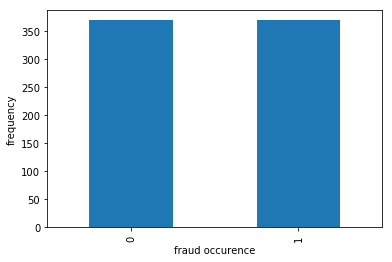

In [764]:
class_count = pd.value_counts(creditcard_sample['Class'], sort=True).sort_index()
class_count.plot(kind='bar')
plt.xlabel('fraud occurence')
plt.ylabel('frequency')

#Lets train the model ...Save 20% for testing.

In [765]:
X_train,X_test,y_train,y_test = train_test_split(X_sample,y_sample,test_size=0.2,random_state=42)

In [766]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
260,35906.0,-3.519030,4.140867,-3.628202,5.505672,-4.057463,-0.905945,-6.652031,2.634524,-4.679402,...,0.898723,1.582556,0.778710,-0.135707,-0.004278,0.032706,0.362014,0.900925,0.554897,9.13
430,54932.0,0.834806,-0.527557,1.165588,1.384518,-1.014368,0.435886,-0.651651,0.372244,0.591982,...,0.011392,0.275949,0.642865,-0.137854,0.228956,0.294957,-0.252170,0.050961,0.042905,125.00
135,77247.0,1.145692,0.117006,-0.125420,0.558985,0.032449,-0.539126,0.248220,-0.225153,-0.059469,...,0.184940,-0.278797,-0.955844,-0.063204,-0.466008,0.326844,0.133993,-0.034833,0.039640,89.99
360,161182.0,0.144233,1.025195,-0.593335,-0.792215,1.296969,-0.190553,0.902427,0.032327,-0.372989,...,0.088306,-0.318542,-0.766164,0.004738,0.006392,-0.356233,0.126088,0.222751,0.070070,1.79
28,72461.0,1.165210,-0.132262,0.474439,1.230757,-0.134946,0.803867,-0.412015,0.252640,0.701152,...,-0.085387,-0.127143,-0.101496,-0.273102,-0.815222,0.803567,-0.234120,0.047506,0.007051,26.75


In [767]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict

#False positive -.. not fraud ...classified as fraud.
#False negative -  fraud....but not classified as fraud.
#We need to minimize the False negatives...this will cause loss of money to business.  
#recall_score = tp/tp+fn ~ => 1 should be maximized.

In [768]:
c_values = [0.1,0.5,1.0,10,20,30,40,50]
logreg = LogisticRegression(random_state=42)
param_grid = dict(C=c_values)
grid = GridSearchCV(logreg, param_grid, cv=10, scoring='recall_micro')
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.5, 1.0, 10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, scoring='recall_micro',
       verbose=0)

In [769]:
grid.best_params_

{'C': 0.5}

In [770]:
logreg = LogisticRegression(C=0.5,penalty = 'l2')
y_predicted = cross_val_predict(logreg,X_train,y_train,cv=10)
print metrics.recall_score(y_train,y_predicted)

0.929054054054


In [771]:
logreg.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [772]:
y_predict_test = logreg.predict(X_test)
print metrics.recall_score(y_test,y_predict_test)

0.904109589041


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faf1e9aa710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7faf1e98e6d0>], dtype=object)

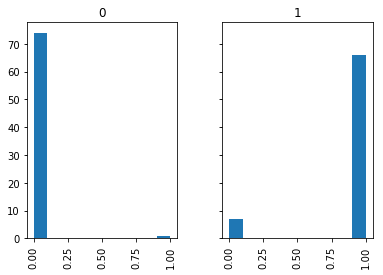

In [773]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame(data = {'probability':y_predict_test, 'actual':y_test})
df.probability.hist(by=df.actual, sharex=True, sharey=True)

In [774]:
logreg.fit(X_train,y_train)
y_predicted = logreg.predict(X_orig)
print metrics.recall_score(y_orig,y_predicted)

0.90243902439


In [775]:
print metrics.confusion_matrix(y_orig,y_predicted)

[[277689   6626]
 [    48    444]]


In [776]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_orig)[:,1]
print y_pred_prob

[ 0.46852553  0.48218684  0.39326202 ...,  0.03763134  0.01869092
  0.01232185]


In [777]:
print metrics.roc_auc_score(y_orig,y_pred_prob)

0.969987356575


##93% recall score is pretty good... and 98% ROC_AUC_Score...means good balance between Sensitivity and Specificity

#Lets see hows the balance between Sensitivity and Specificity??

In [778]:
precision = dict()
recall = dict()
average_precision = dict()
precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_orig.ravel(),y_predicted.ravel())
average_precision["micro"] = metrics.average_precision_score(y_orig, y_predicted,
                                                     average="micro")

(0.0, 1.05)

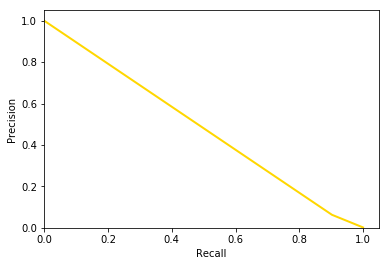

In [779]:
plt.clf()
plt.plot(recall["micro"], precision["micro"], color='gold', lw=2,
         label='micro-average Precision-recall curve (area = {0:0.2f})'
               ''.format(average_precision["micro"]))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])

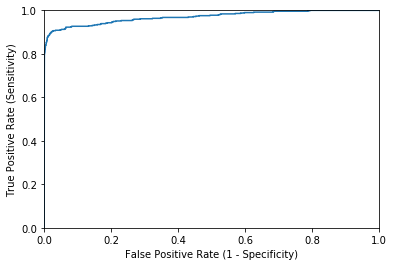

In [780]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_orig, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [781]:
y_orig.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [782]:
#Sniff test
cc =  creditcard[creditcard.Class ==1]
y_pred = logreg.predict(cc.iloc[0:100,:-1])

In [783]:
print y_pred

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1]


In [784]:
#Predict using decision forest ensemble

In [746]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.grid_search import GridSearchCV


# Warning - It took 1hour, 10 mins - for the Grid Search.

#Lets fidn the best parameters for RandomForest by GridSearch

In [547]:
max_depth_range = range(1, 20)
n_est = range(50,100,10)
min_samp_leaf=range(1,10)
param_grid_search = dict(max_depth=max_depth_range,n_estimators=n_est,min_samples_leaf=min_samp_leaf)

rfreg = RandomForestRegressor(random_state=1,n_jobs=-1)
grid = GridSearchCV(rfreg,param_grid_search,cv=10)
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=1,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 60, 70, 80, 90], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [548]:
print grid.best_score_
print grid.best_params_

0.875706850738
{'n_estimators': 80, 'max_depth': 14, 'min_samples_leaf': 1}


#Fit with best params

In [161]:
rfreg=RandomForestRegressor(n_estimators=80,max_depth=14,min_samples_leaf=1,n_jobs=-1,random_state=1)

In [162]:
y_predicted = cross_val_predict(rfreg,X_train,y_train,cv=10).astype(int)
print metrics.recall_score(y_train,y_predicted)

0.745819397993


In [553]:
rfreg.fit(X_train,y_train)
y_predicted = rfreg.predict(X_orig).astype(int)
print metrics.recall_score(y_orig,y_predicted)

0.741869918699


In [554]:
print metrics.confusion_matrix(y_orig,y_predicted)
print metrics.roc_auc_score(y_orig,y_predicted)

[[284237     78]
 [   127    365]]
0.870797787551


In [555]:
X_orig.shape

(284807, 30)

##RandomForestRegressor is overfitting in both trainging and testing...Why????
##May be the number of features are not enough??

In [220]:
#Trying Decision tree with Bagging.